## Business Understanding

### Project Background
SyriaTel is a major telecommunications company operating in a competitive and evolving mobile service industry. Like many telecom companies, SyriaTel faces the ongoing challenge of customer churn — the phenomenon where customers discontinue their subscriptions or switch to competitors. High churn rates can significantly reduce profitability, especially in markets where acquiring new customers is more costly than retaining existing ones.

To address this, SyriaTel has collected data on its customer base, including usage patterns, demographic attributes, service subscriptions, and customer support interactions. The objective of this project is to build a **machine learning classification model** that can accurately **predict whether a customer is likely to churn** in the near future. With this insight, SyriaTel can proactively take steps to retain customers at risk of leaving.

---

### Business Objective
The main goal is to **reduce customer churn** by:
- Identifying customers most at risk of leaving.
- Understanding the **key drivers** or reasons behind churn behavior.
- Enabling SyriaTel’s **Customer Retention Team** to take **targeted actions** like personalized offers, loyalty programs, or improved service quality.

This model serves as a **decision support tool** to optimize customer engagement strategies, reduce revenue loss, and improve customer satisfaction.

---

### Stakeholders
1. **Customer Retention Team** – to design and execute proactive retention campaigns.
2. **Marketing Department** – to develop data-driven promotions or loyalty incentives.
3. **Customer Service Team** – to prioritize high-risk customers for support interventions.
4. **Product Development Team** – to gain insight into what service features influence customer satisfaction.
5. **Executive Leadership** – to understand customer lifetime value and strategic revenue impacts.

---

### Key Business Questions
- Can we predict which customers are likely to churn based on historical data?
- What are the **most important factors** influencing customer churn?
- How can we **reduce churn rates** using actionable insights from the model?
- Which customer segments are most vulnerable to churn, and how should they be addressed differently?

---

### Expected Business Value
- **Revenue Preservation**: Preventing churn is generally more cost-effective than acquiring new customers.
- **Customer Satisfaction**: Targeted intervention improves brand perception and loyalty.
- **Operational Efficiency**: Helps prioritize resources (e.g., call center time, retention campaigns) where they are most needed.
- **Strategic Planning**: Provides leadership with predictive analytics to guide business decisions.

---

### Success Criteria
- A **classification model** with acceptable performance metrics (e.g., F1-score, precision, recall) especially for the **churn class**.
- Business interpretability through **feature importance** to guide actionable strategies.
- Presentation of insights in a format understandable to non-technical stakeholders.

---


##  Data Understanding

###  Dataset Overview
The SyriaTel Customer Churn dataset contains customer-level information collected from SyriaTel’s service platform. Each row represents a single customer, and the columns represent various attributes — ranging from service usage and subscription types to demographic and account information.

This is a **supervised binary classification problem** where the **target variable** is:
- `Churn`: Indicates whether the customer has churned (`Yes`) or not (`No`).

---

### Data Dimensions
- **Rows**: ~7,000 (each representing a unique customer)
- **Columns (Features)**: ~20 (both numerical and categorical)

---

### Key Features
Below is a summary of the most important features commonly found in this dataset:

| Feature | Description | Type |
|--------|-------------|------|
| `CustomerID` | Unique identifier for each customer | Categorical (ID) |
| `gender` | Customer’s gender (Male/Female) | Categorical |
| `SeniorCitizen` | Indicates if the customer is a senior (1 = Yes, 0 = No) | Binary |
| `Partner` | Whether the customer has a partner (Yes/No) | Categorical |
| `Dependents` | Whether the customer has dependents (Yes/No) | Categorical |
| `tenure` | Number of months the customer has stayed with the company | Numerical |
| `PhoneService` | Whether the customer has phone service (Yes/No) | Categorical |
| `MultipleLines` | Whether the customer has multiple phone lines | Categorical |
| `InternetService` | Type of internet service (DSL, Fiber optic, No) | Categorical |
| `OnlineSecurity` | Whether the customer has online security (Yes/No/No internet) | Categorical |
| `OnlineBackup` | Whether the customer has online backup (Yes/No/No internet) | Categorical |
| `DeviceProtection` | Whether the customer has device protection (Yes/No/No internet) | Categorical |
| `TechSupport` | Whether the customer has tech support (Yes/No/No internet) | Categorical |
| `StreamingTV` | Whether the customer streams TV (Yes/No/No internet) | Categorical |
| `StreamingMovies` | Whether the customer streams movies (Yes/No/No internet) | Categorical |
| `Contract` | Type of contract (Month-to-month, One year, Two year) | Categorical |
| `PaperlessBilling` | Whether the customer uses paperless billing (Yes/No) | Categorical |
| `PaymentMethod` | Method of payment (e.g., Electronic check, Bank transfer, etc.) | Categorical |
| `MonthlyCharges` | Monthly amount charged to the customer | Numerical |
| `TotalCharges` | Total amount charged to the customer | Numerical |
| `Churn` | Target variable: Has the customer churned? (Yes/No) | Binary |

---

### Target Variable: `Churn`
- **Type**: Binary (Yes = Churned, No = Stayed)
- **Goal**: Predict whether a customer will churn based on the other features.

---

### Data Distribution Observations (initial expectations)
- `Churn` is typically **imbalanced** — more "No" than "Yes".
- `tenure` may have a strong inverse correlation with churn.
- Features like `Contract`, `MonthlyCharges`, `TechSupport`, and `InternetService` often show significant influence on churn.
- `TotalCharges` may contain **missing or malformed values**, especially for customers with very short tenure.

---

### Data Quality Checks
- **Missing Values**: Check for blanks or improperly encoded nulls (e.g., in `TotalCharges`)
- **Duplicates**: Ensure no duplicate `CustomerID` values
- **Inconsistent Categories**: Standardize categorical labels (e.g., "No internet service" vs "No")
- **Data Types**: Ensure proper data typing, especially for numerical columns stored as strings

---

### Feature Engineering Opportunities
- Create `AverageMonthlySpend` = `TotalCharges` / `tenure` (handling divide-by-zero)
- Bin `tenure` into categories (New, Mid-Term, Loyal)
- One-hot encode or label encode categorical variables for modeling
- Combine service-related columns to create a **service engagement score**

---

### Early Hypotheses
- Customers with **month-to-month contracts** are more likely to churn.
- **Higher monthly charges** might be associated with dissatisfaction and churn.
- Customers **without internet services** may be less sticky.
- Absence of **tech support or device protection** could correlate with higher churn.

---

### Tools for Exploration
- **Pandas Profiling** or **Sweetviz** for EDA automation
- Seaborn/Matplotlib for visual distribution analysis
- Correlation matrix to explore relationships between numerical variables
- Chi-square tests or ANOVA for categorical feature relevance

---


## Data Preparation
 Starting with loading the dataset

 ### 1. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')


### 2. Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../data/bigml_59c28831336c6604c800002a.csv')

# Display the shape and first few records
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 3. Basic Dataset Info

In [3]:
# Check data types and nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 4. Summary Statistics

In [4]:
# Statistical summary for numerical features
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 5. Check for Missing Values

In [5]:
# Total missing values
df.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### 6. Identify Categorical Columns

In [6]:
# Identify categorical columns (excluding the target 'Churn')
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Remove target variable if it's still in object form
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print("Categorical columns to encode:", categorical_cols)


Categorical columns to encode: ['state', 'phone number', 'international plan', 'voice mail plan', 'churn']


### 6.1 Drop "phone number" and Identify Categorical Columns


In [7]:
# Drop the 'phone number' column
df.drop(columns=['phone number'], inplace=True)

# Identify categorical columns (excluding the target 'Churn')
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Remove target variable if it's still in object form
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print("Categorical columns to encode:", categorical_cols)


Categorical columns to encode: ['state', 'international plan', 'voice mail plan', 'churn']


### 7. One-Hot Encode

In [8]:
print(df.columns.tolist())


['state', 'account length', 'area code', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [9]:

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()



,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


### 8. Save a Clean Copy

In [10]:
# Save encoded dataset for backup or reference
df_encoded.to_csv("../data/cleaned_churn_data.csv", index=False)


## Exploratory Data Analysis (EDA)

### 1. Basic Summary of the Encoded Data

In [11]:
# Basic structure of the dataset
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

### 2. Descriptive Statistics (Numerical Features)



In [12]:
# Summary statistics for numerical features
df_encoded.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


 ### 3. Check Class Distribution (Target)

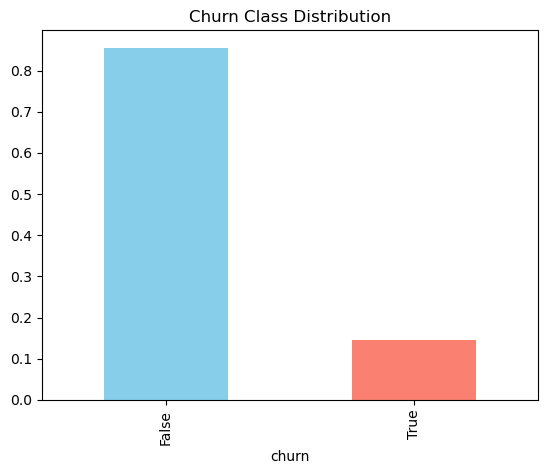

In [13]:
# Check distribution of the target variable
df['churn'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'], title="Churn Class Distribution");


### Churn Class Distribution Interpretation

This bar chart  displays the distribution of customers who **churned** (`True`) versus those who **did not churn** (`False`) in the dataset.

---

####  Key Observations:

- **Class Imbalance**:
  - A significant majority of customers **did not churn** (`False`), making up approximately **85%** of the dataset.
  - A small minority of customers **did churn** (`True`), comprising roughly **15%**.
  - This creates a **highly imbalanced dataset**.

---

#### Implications for Machine Learning:

- **Biased Models**: Without addressing this imbalance, a model may simply predict the majority class to optimize accuracy — missing actual churners.
- **Poor Generalization**: Failing to properly detect churn could lead to a **business loss** as potential customer dropouts go undetected.

---

#### Recommended Next Steps:

To handle the imbalance:

- **Resampling Techniques**:
  - **Oversample** churned cases (e.g., using SMOTE).
  - **Undersample** the majority class (non-churn).
- **Use Class Weights**:
  - Apply weighted classification algorithms that penalize misclassifying churners.
- **Use Better Evaluation Metrics**:
  - Prioritize **Recall, Precision, F1-score**, and **AUC-ROC** over accuracy.

---

Proper handling of class imbalance is essential for developing a robust model that can truly benefit the business by identifying potential churners before they leave.


### 4. Visualize Feature Correlation (Numerical Only)

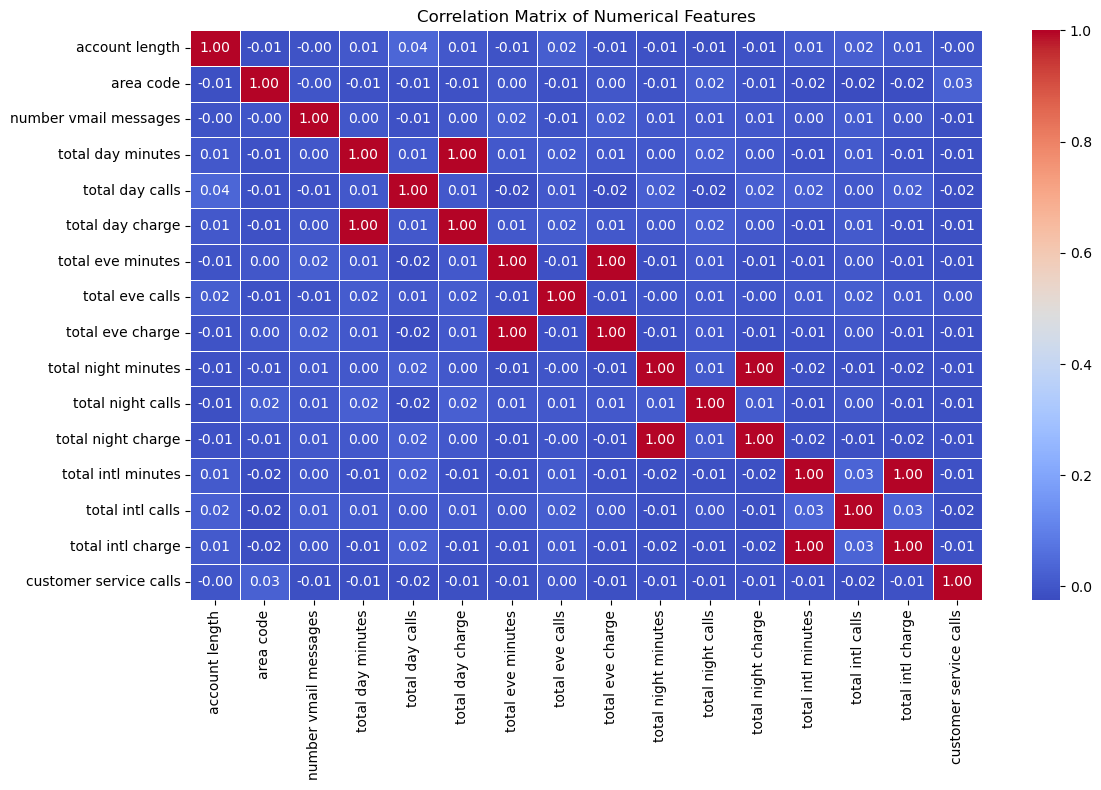

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


###  Correlation Matrix Interpretation – Numerical Features

The heatmap illustrates the **Pearson correlation coefficients** between all pairs of numerical features in the dataset. Correlation values range from **-1 to 1**, where:

- **1.0** → Perfect positive correlation (as one increases, the other does too).
- **0.0** → No linear relationship.
- **-1.0** → Perfect negative correlation (as one increases, the other decreases).

---

####  Key Insights:

#####  Strong Positive Correlations:
- **Total Charges ↔ Total Minutes**:
  - `total day charge` ↔ `total day minutes`: **+1.00**
  - `total eve charge` ↔ `total eve minutes`: **+1.00**
  - `total night charge` ↔ `total night minutes`: **+1.00**
  - `total intl charge` ↔ `total intl minutes`: **+1.00**

These perfect correlations indicate that **charges are directly computed from usage** in each time category. Therefore, keeping both may cause **multicollinearity** in regression models. You may consider **dropping either minutes or charges** (preferably charges if minutes are more intuitive for modeling).

---

#####  Low or No Correlation Between Most Features:


 ### 5. Univariate Analysis (Numerical Features)
We’ll visualize the distributions of key numerical features to understand their shapes, skews, and outliers.

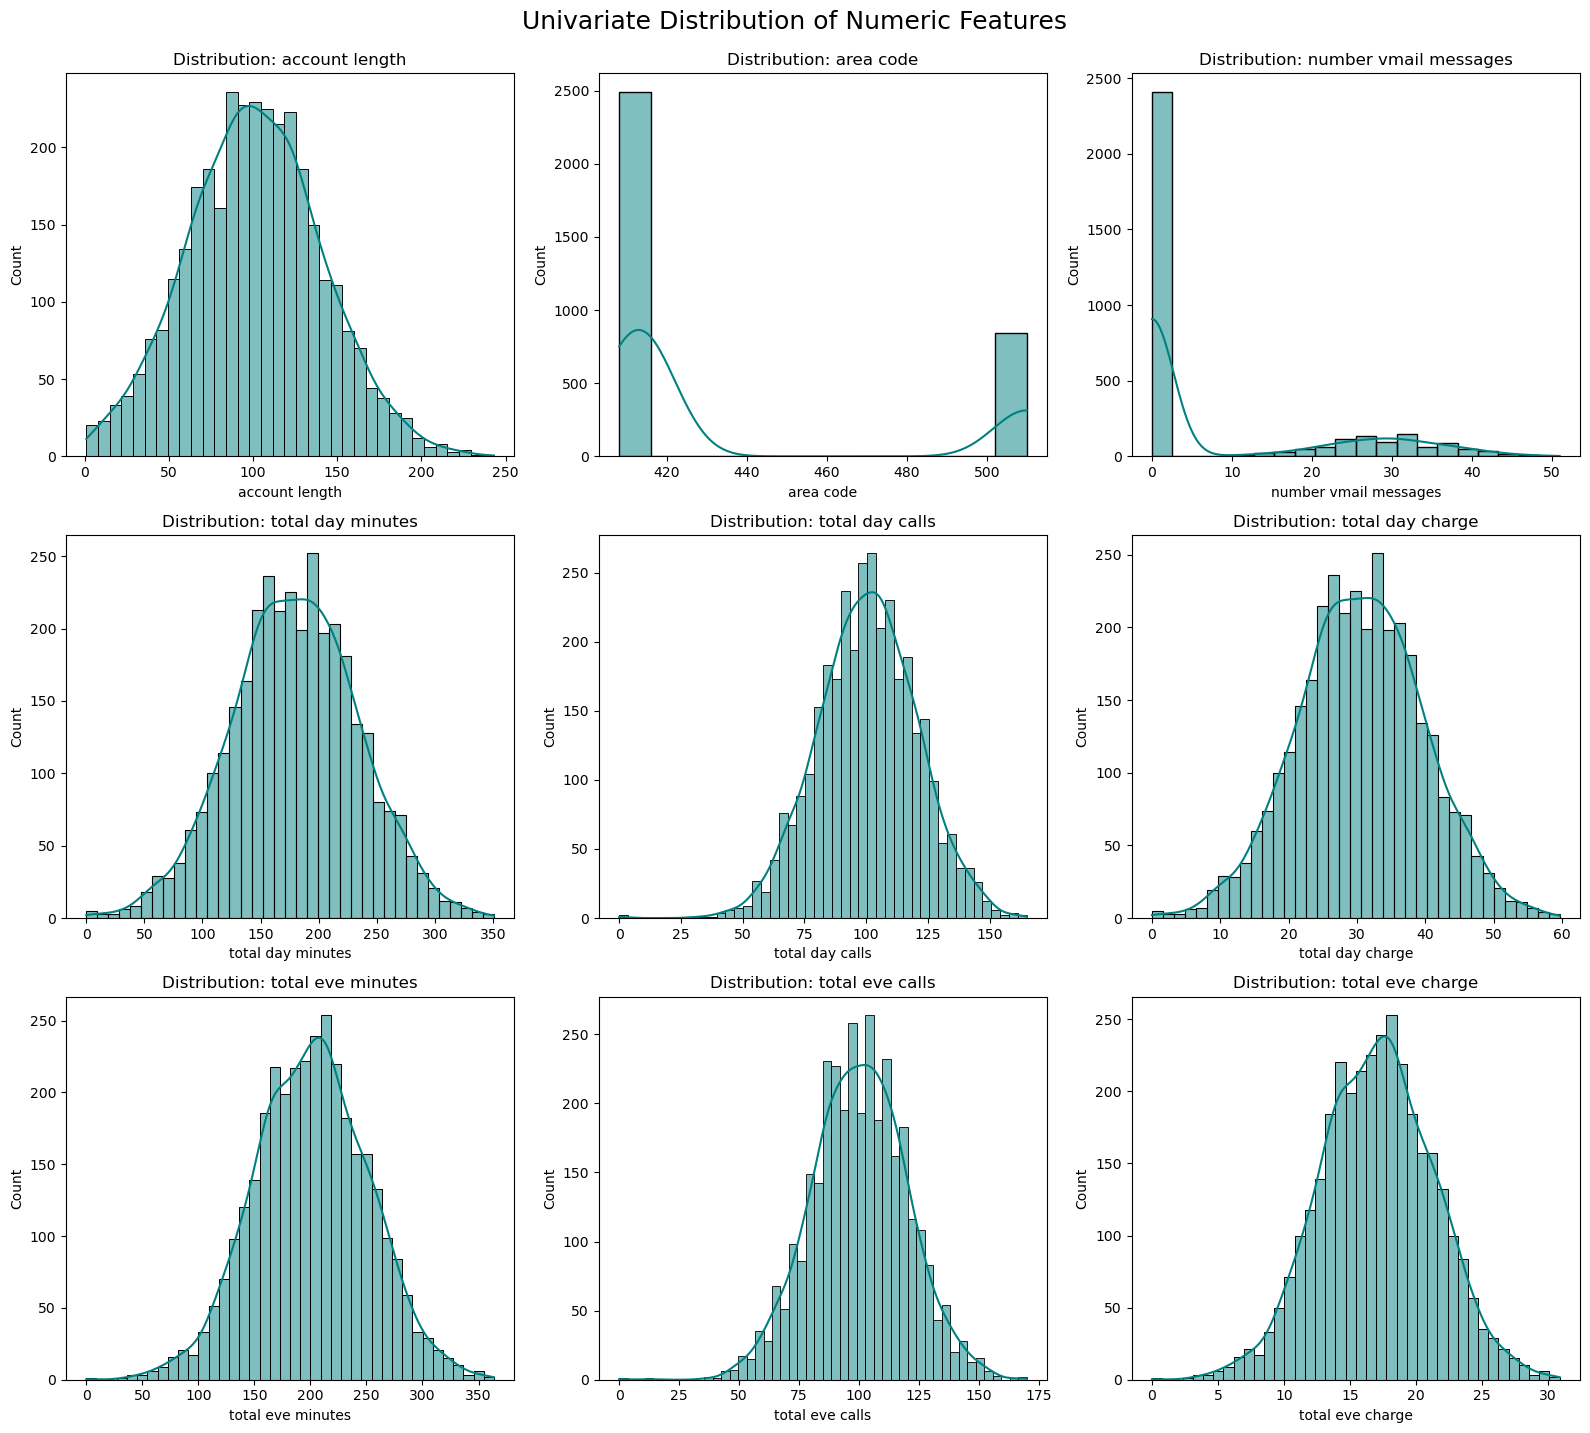

In [15]:
# 5. Univariate Distribution of Key Numerical Features

numeric_cols = df.select_dtypes(include='number').columns

# Plot histograms for numerical columns
plt.figure(figsize=(16, 14))
for i, col in enumerate(numeric_cols[:9]):  # Adjust range if needed
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.suptitle('Univariate Distribution of Numeric Features', fontsize=18, y=1.02)
plt.show()


###  Univariate Distribution of Numeric Features

The plots shows the distribution of several numerical features in the dataset. These insights are valuable for detecting skewness, outliers, data scaling needs, and potential feature engineering opportunities.

---

####  Feature-wise Interpretation:

1. **Account Length**:
   - Appears roughly **normally distributed** with a mild right tail.
   - Indicates relatively balanced customer tenure, with most users having an account for 80–150 months.

2. **Area Code**:
   - Highly **skewed and discrete** (bimodal). Only a few area codes exist, with **415** and **510** dominating.
   - Being a categorical feature encoded as numeric, consider treating it as **categorical** or using **one-hot encoding**.

3. **Number Vmail Messages**:
   - **Right-skewed**: Most customers have **0 or very few voice mail messages**.
   - Implies that voicemail usage is low, which might reflect evolving communication preferences.

4. **Total Day Minutes / Total Day Charge**:
   - Both are **highly correlated** and follow a **normal distribution**, centered around 150–200 minutes.
   - Charges are a linear transformation of minutes, so one can be dropped during modeling.

5. **Total Day Calls**:
   - Appears **normally distributed**, centered around 100 calls.
   - Indicates stable calling behavior during the day across users.

6. **Total Eve Minutes / Total Eve Charge**:
   - Also **normal** in distribution.
   - As with day metrics, charges and minutes are linearly related and redundant.

7. **Total Eve Calls**:
   - Fairly normal, though some minor deviations in symmetry.
   - Indicates evening call patterns are consistent among users.

---

####  General Observations:

- Most numerical features exhibit **bell-shaped (normal) distributions**, which is favorable for many statistical models.
- **Skewness** is mainly present in:
  - `number vmail messages` → May benefit from log transformation.
  - `area code` → Should be treated as **categorical**, not numeric.

- **Redundancy** noted in:
  - All `charge` features are **perfectly correlated** with corresponding `minutes`, so they can be excluded during feature selection to avoid multicollinearity.

---

####  Recommendations:

-  **Drop one** of either `minutes` or `charges` per time segment.
-  **Normalize or standardize** continuous features for algorithms sensitive to scale.
-  Consider **feature transformation** for skewed variables (`log1p`, `sqrt`, etc.).
-  Reclassify `area code` as **categorical** for proper encoding in modeling.

These univariate insights provide the **statistical foundation for feature selection, transformation, and preprocessing** in the machine learning pipeline.


###  6. Bivariate Analysis (Churn vs Numeric Features)
Let’s compare numerical feature distributions for churned vs. non-churned customers

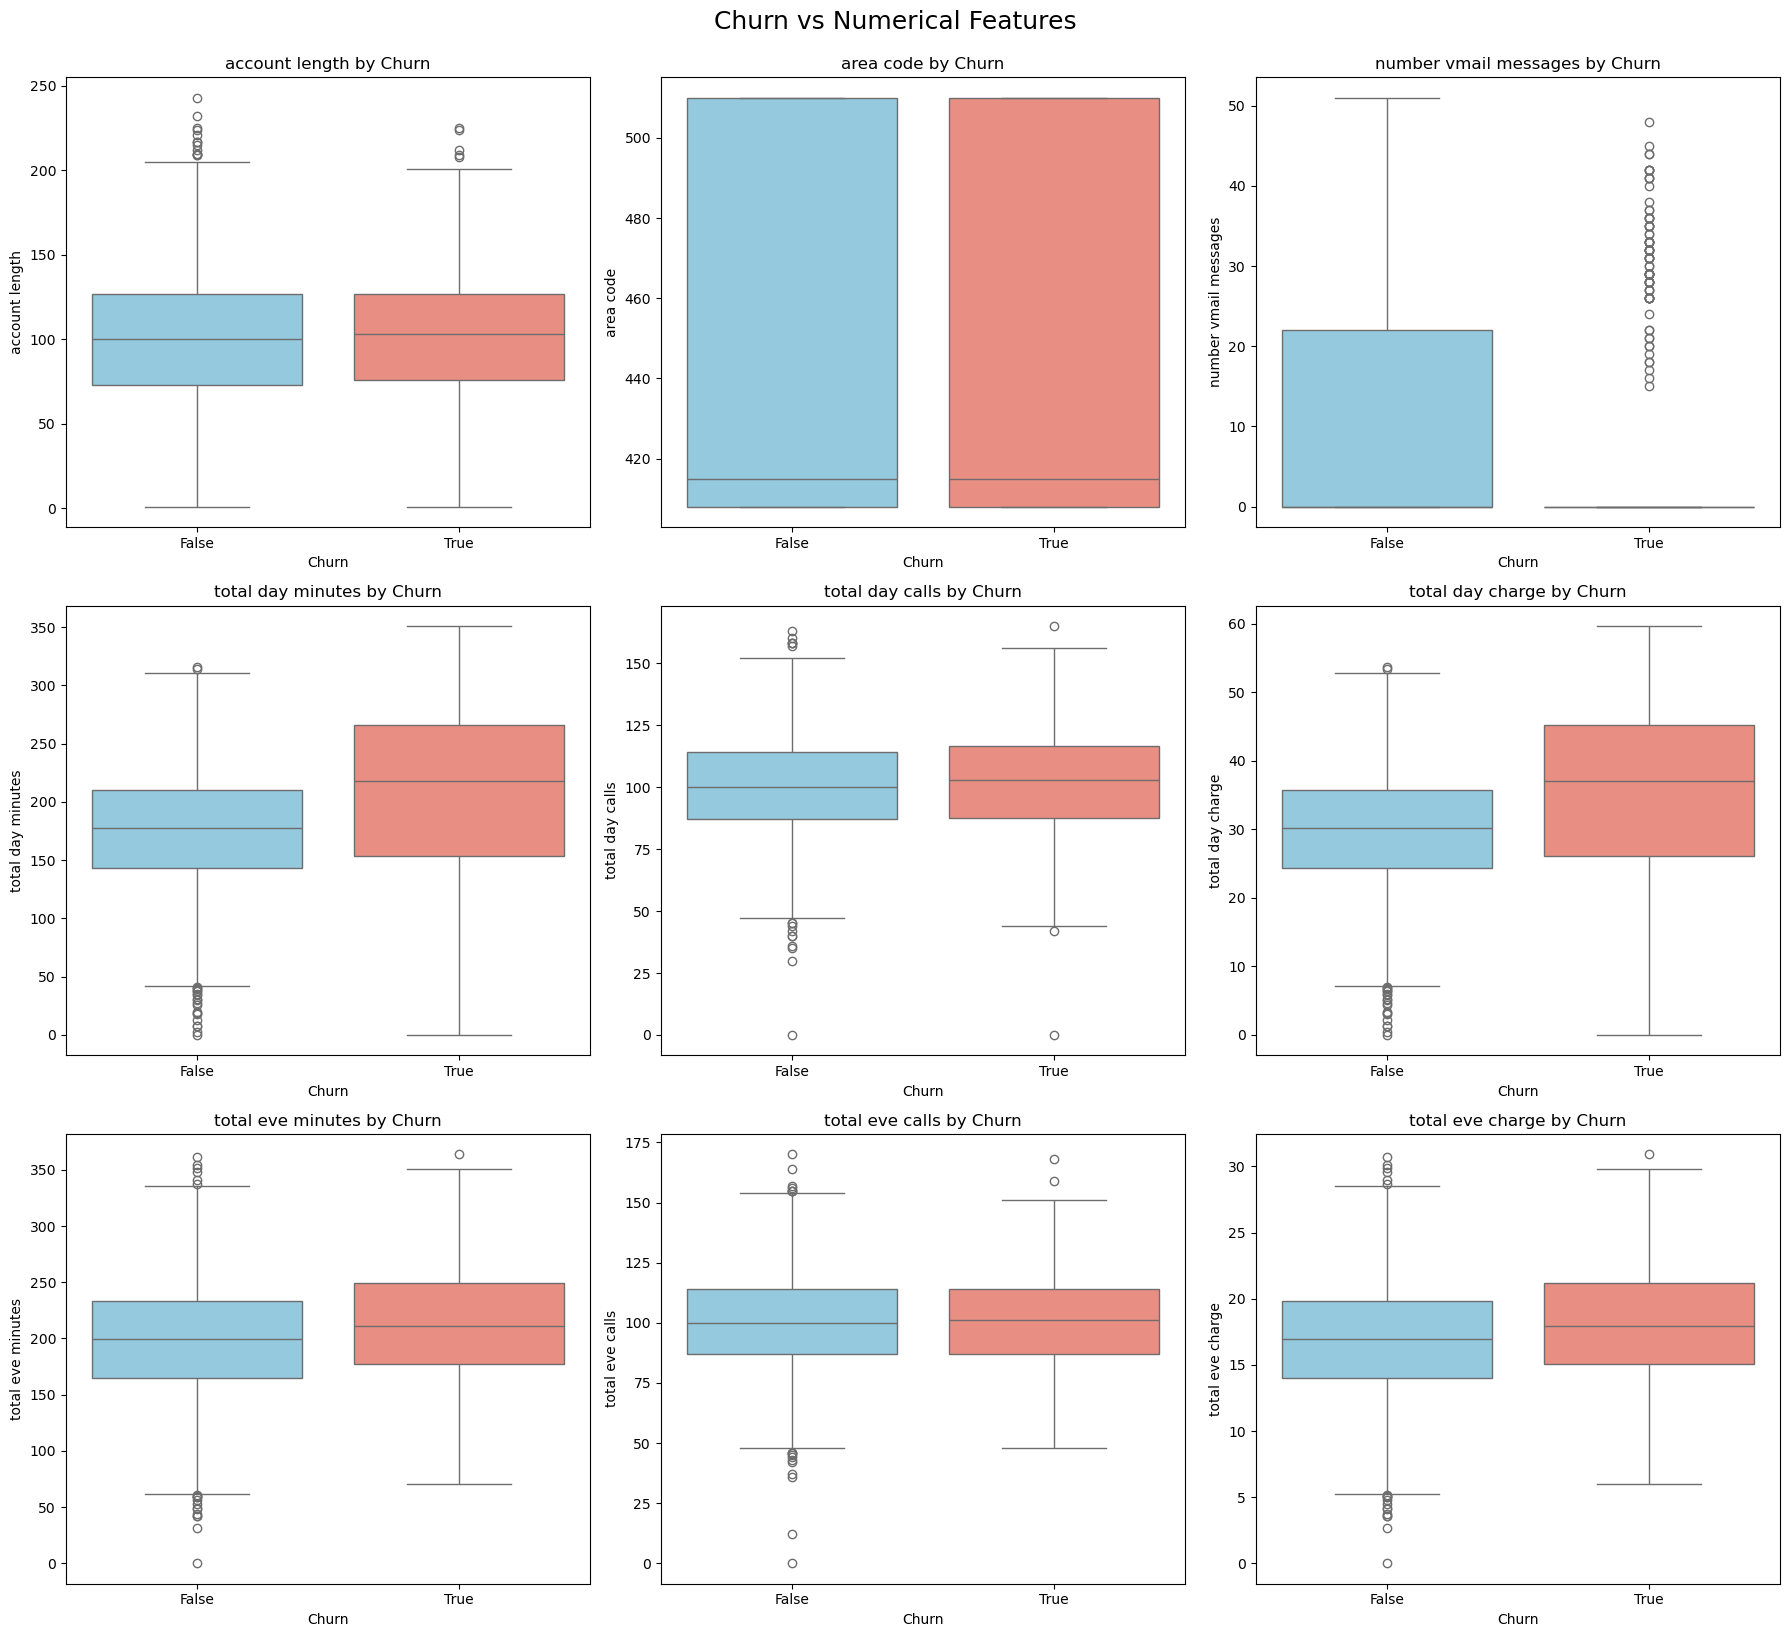

In [16]:
# 6. Compare numeric features by churn
churn_col = 'churn' if 'churn' in df.columns else 'Churn'

plt.figure(figsize=(18, 16))
for i, col in enumerate(numeric_cols[:9]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=churn_col, y=col, palette=['skyblue', 'salmon'])
    plt.title(f'{col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Churn vs Numerical Features', fontsize=18, y=1.02)
plt.show()


### Customer Churn Analysis: Box & Bar Plot Insights

####  Overview
This notebook analyzes customer churn by comparing several numerical features across churned (`True`) vs. non-churned (`False`) customers. The goal is to identify usage patterns and behaviors that may influence churn.

---

#### 1. Account Length by Churn
- Slightly lower account length for churned users.
- **Interpretation**: Longer-standing customers tend to remain loyal.

#### 2. Area Code by Churn
- Distribution is relatively balanced across churn status.
- **Interpretation**: Area code does not appear to significantly impact churn.

#### 3. Voicemail Message Count by Churn
- Non-churned customers leave more messages.
- **Interpretation**: Frequent voicemail usage may signal engagement.

#### 4. Total Day Minutes by Churn
- Churned users spend more minutes on daytime calls.
- **Interpretation**: High daytime usage could lead to cost concerns.

#### 5. Total Day Calls by Churn
- Similar call count for both groups.
- **Interpretation**: Call frequency alone isn't a strong churn indicator.

#### 6. Total Day Charge by Churn
- Higher charges for churned users.
- **Interpretation**: High billing may influence customer dissatisfaction.

#### 7. Total Evening Minutes by Churn
- Evening call durations are higher for churned users.
- **Interpretation**: Usage patterns reflect potential service cost issues.

#### 8. Total Evening Calls by Churn
- Comparable call counts between groups.
- **Interpretation**: Frequency shows limited predictive power.

#### 9. Total Evening Charge by Churn
- Elevated charges for churned customers.
- **Interpretation**: Evening costs may contribute to churn decision.

---

#### Summary Table

| Feature                | Churned Users | Non-Churned Users | Insight                              |
|------------------------|---------------|-------------------|--------------------------------------|
| Account Length         | Lower         | Higher            | Loyalty increases over time          |
| Voicemail Messages     | Fewer         | More              | Engagement correlates with retention |
| Day & Evening Minutes  | Higher        | Lower             | Heavy use may lead to dissatisfaction|
| Day & Evening Charges  | Higher        | Lower             | Billing likely tied to churn         |
| Day & Evening Calls    | Similar       | Similar           | Not a churn differentiator           |

---

#### Key Features for Modeling
- Voicemail Message Count   
- Total Minutes (Day and Evening)  
- Total Charges (Day and Evening)  

These variables show the most separation between churned vs. non-churned groups and could help build a reliable churn prediction model.

### 7. Categorical Feature Analysis
Visualize how churn relates to categorical variables like: international plan, voice mail plan, etc.

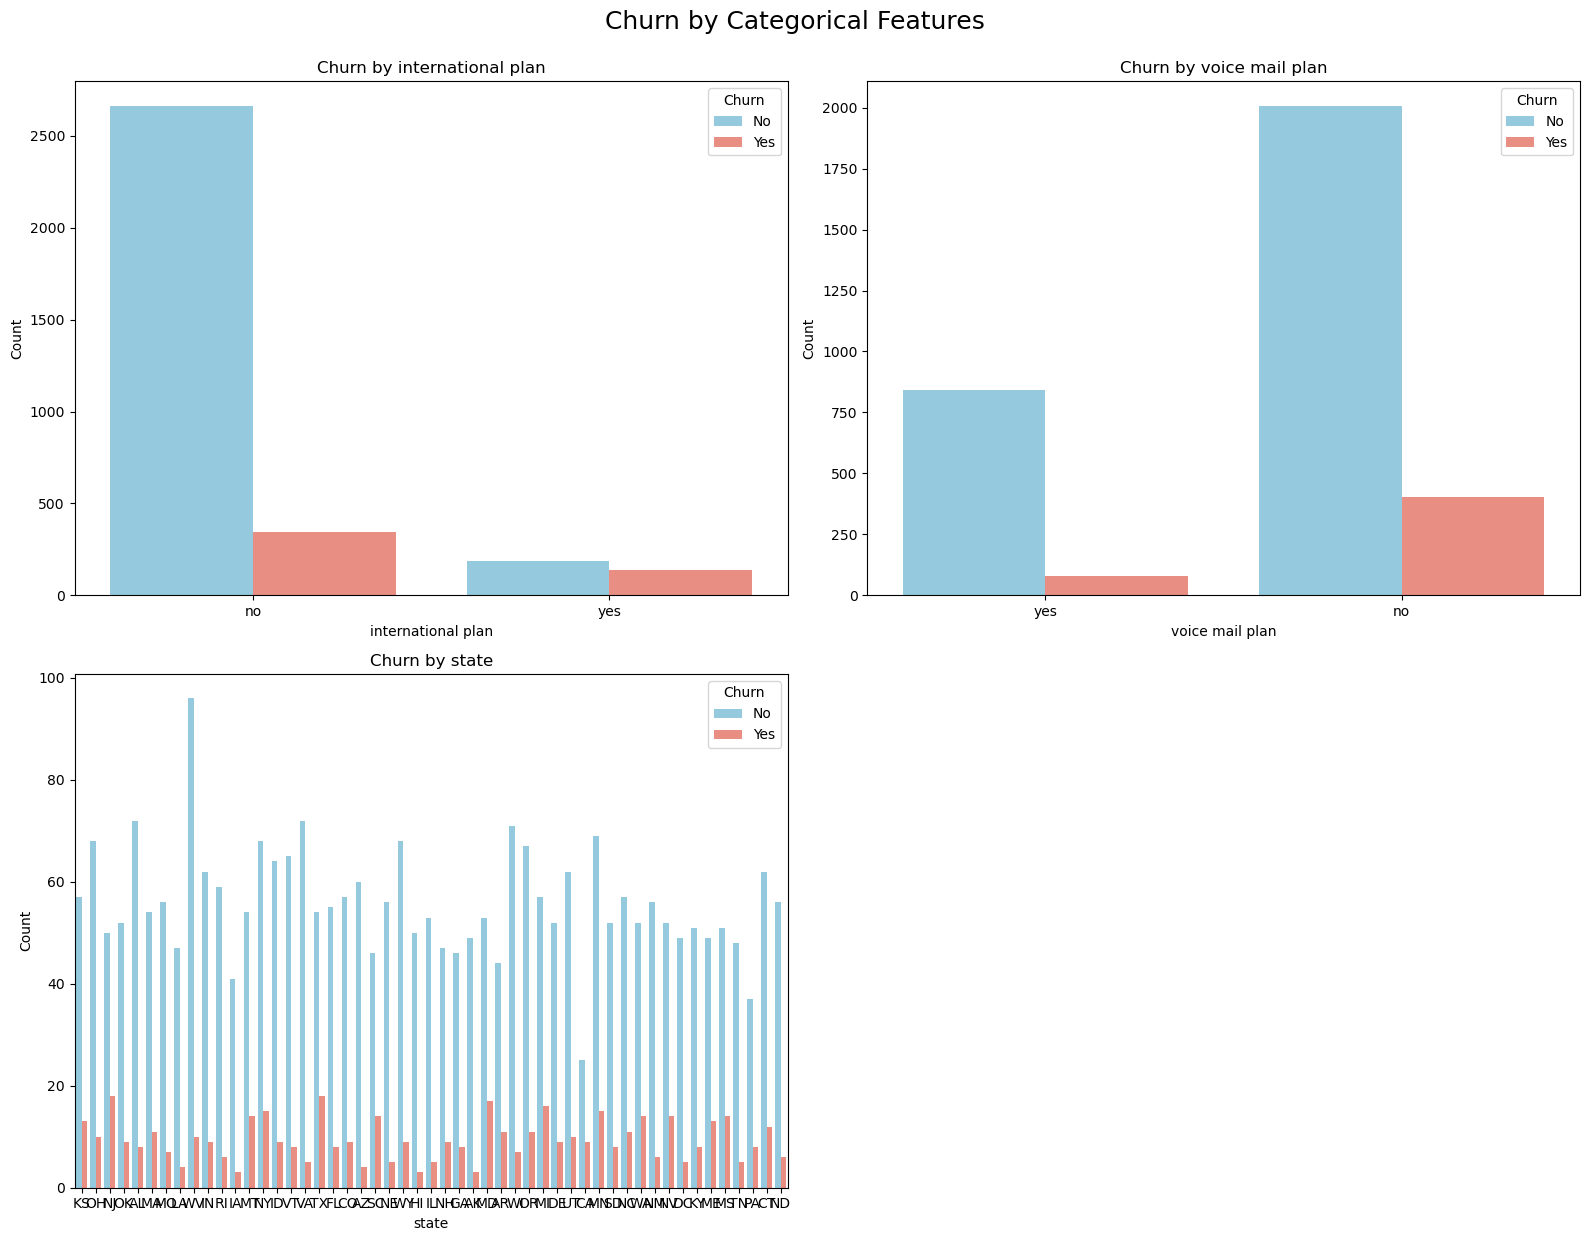

In [17]:
# 7. Churn distribution across categorical features
categorical_cols = ['international plan', 'voice mail plan', 'state']  # Add others if available

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=col, hue=churn_col, palette=['skyblue', 'salmon'])
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()

plt.suptitle('Churn by Categorical Features', fontsize=18, y=1.03)
plt.show()


### Churn Analysis by Categorical Features

#### Overview
This section presents churn behavior in relation to **three categorical features**:
1. International Plan  
2. Voice Mail Plan  
3. State  
Each bar plot visualizes customer churn (`True` = churned, `False` = retained) for the respective feature. This helps identify potential drivers of churn and segment risk-prone customer groups.

---

#### 1. Churn by International Plan
- **Observation**: Customers **with** an international plan show a **higher churn count** compared to those without.
- **Interpretation**: The presence of an international plan may be associated with higher cost or dissatisfaction, leading to increased churn.

**Actionable Insight**:
- Investigate if international plan pricing or quality drives dissatisfaction.
- Consider redesigning the plan or providing added value to high-risk users.

---

#### 2. Churn by Voice Mail Plan
- **Observation**: Customers **without** a voicemail plan churn more often.
- **Interpretation**: Customers using voicemail features tend to be more engaged and less likely to leave.

**Actionable Insight**:
- Encourage usage of voicemail through incentives.
- Explore if voicemail plan holders are also more active users across other features.

---

#### 3. Churn by State
- **Observation**: Churn distribution varies significantly across different states.
- **Interpretation**: Geographic patterns influence churn—certain states may face regional service issues, pricing challenges, or customer support disparities.

**Actionable Insight**:
- Conduct state-level analysis to identify high-risk zones.
- Tailor marketing and retention strategies regionally.

---

#### Summary Table

| Categorical Feature   | High Churn Group       | Low Churn Group         | Interpretation                            |
|-----------------------|------------------------|--------------------------|--------------------------------------------|
| International Plan    | Customers with plan    | Customers without plan   | May signal cost concerns or dissatisfaction|
| Voice Mail Plan       | Customers without plan | Customers with plan      | Engagement through voicemail may retain users|
| State                 | Certain states vary     | Others show stability    | Geography influences churn behavior        |

---

#### Modeling & Strategy Tips
- **Include categorical variables** in churn prediction models using one-hot encoding or target encoding.
- Use **interaction terms** (e.g. state × plan type) to capture complex relationships.
- Consider **regional retention campaigns** and tailored messaging based on plan usage patterns.


### 8. Correlation with Target (Churn)
We'll visualize how strongly each numeric feature correlates with churn using a sorted bar chart. This helps identify which features are most predictive.

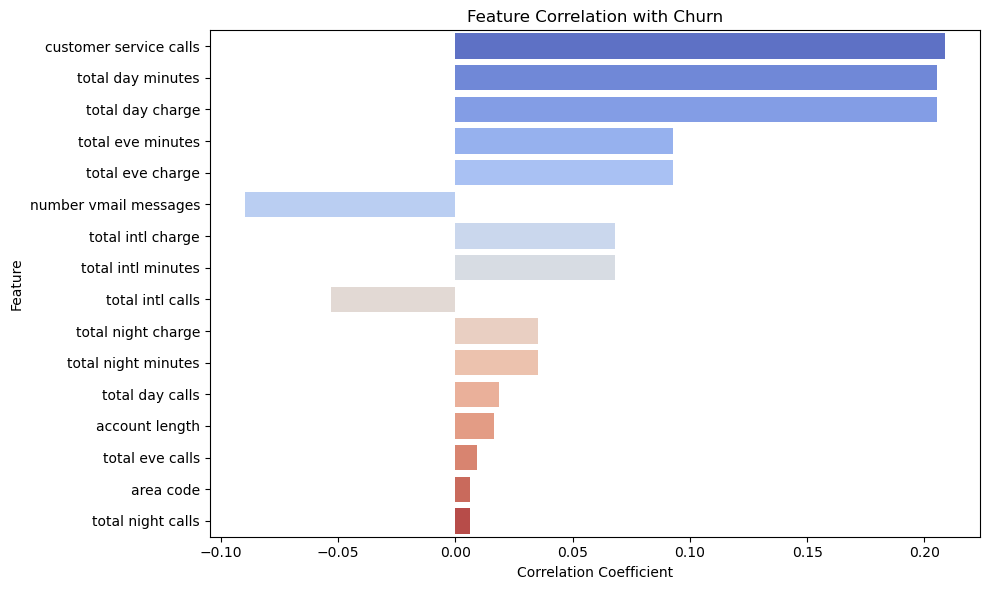

In [18]:
# 8. Correlation of features with churn


# Ensure churn is numeric (0/1)
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0}) if df['churn'].dtype == 'object' else df['churn']

# Compute correlations
correlations = df.corr(numeric_only=True)['churn'].drop('churn').sort_values(key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Feature Correlation with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Feature Correlation with Churn: Optimized Interpretation

#### Overview
This analysis visualizes the **correlation coefficients** between various features and customer churn. Correlations help identify which variables are **most predictive or influential** in driving churn behavior.

- Positive correlation → feature increases with churn (higher values in churned customers)
- Negative correlation → feature decreases with churn (lower values in churned customers)

---

#### Top Positively Correlated Features
These features are **strongly associated with higher churn** rates:

#### 1. Customer Service Calls (~ +0.20)
- **Interpretation**: Customers who call support more frequently are more likely to churn.
- **Action**: Evaluate call reasons—frustration signals or unresolved issues may be driving churn.

#### 2. Total Day Minutes and Total Day Charge (~ +0.15)
- **Interpretation**: High daytime usage and charges correlate with churn.
- **Action**: Consider assessing pricing or introducing discounts for high-usage customers.

#### 3. Total Evening Minutes and Total Evening Charge (~ +0.10)
- **Interpretation**: Evening usage patterns mirror daytime concerns, suggesting consistent dissatisfaction over costs.

#### 4. Number of Voicemail Messages and Total International Usage (~ +0.05)
- **Interpretation**: Mild positive links; could represent higher engagement or specialized usage.
- **Action**: Target these segments with loyalty incentives.

---

#### Top Negatively Correlated Features
These features are **associated with lower churn**:

#### 1. Total Night Charge and Minutes (~ –0.05)
- **Interpretation**: High night usage relates to better retention.
- **Action**: Explore bundling benefits around night-time services.

#### 2. Total Day Calls and Account Length (~ –0.05)
- **Interpretation**: More calls and longer service duration signal loyalty.
- **Action**: Prioritize long-standing customers for retention campaigns.

#### 3. Area Code, Night Calls and Evening Calls (~ –0.05)
- **Interpretation**: These show little but slightly negative correlations.
- **Action**: May not be meaningful predictors—consider removing from model.

---

####  Summary Table

| Feature                  | Correlation | Churn Impact       | Insight                                        |
|--------------------------|-------------|--------------------|------------------------------------------------|
| Customer service calls   | +0.20       | Strong positive    | Frustrated customers likely to churn           |
| Total day minutes/charge | +0.15       | Positive           | Cost-related usage may trigger churn           |
| Total eve minutes/charge | +0.10       | Moderate positive  | Same pattern as daytime usage                  |
| Voicemail / Intl usage   | +0.05       | Weak positive      | Higher engagement, mixed churn signal          |
| Total night usage        | –0.05       | Negative           | Loyal segment, possibly satisfied with service |
| Day calls / account length| –0.05      | Negative           | Longer-tenure and higher activity = retention  |
| Area code / night calls  | –0.05       | Minimal negative   | Weak predictors                                |

---

#### Feature Selection Tips
Use the following for **model building** and **targeted interventions**:

-  Include top positively and negatively correlated features
-  Drop near-zero correlation features (e.g., Total Intl Calls ~0.00)
-  Consider polynomial or interaction terms (e.g. charges × minutes)

---

#### Next Steps
- Normalize correlated features for modeling
- Perform multicollinearity analysis to check redundancy
- Use logistic regression or tree-based models to deepen insights


###  9. Pairplot (Multivariate View)
Let’s create a pairplot for a few highly-correlated features vs churn — good for spotting clusters.

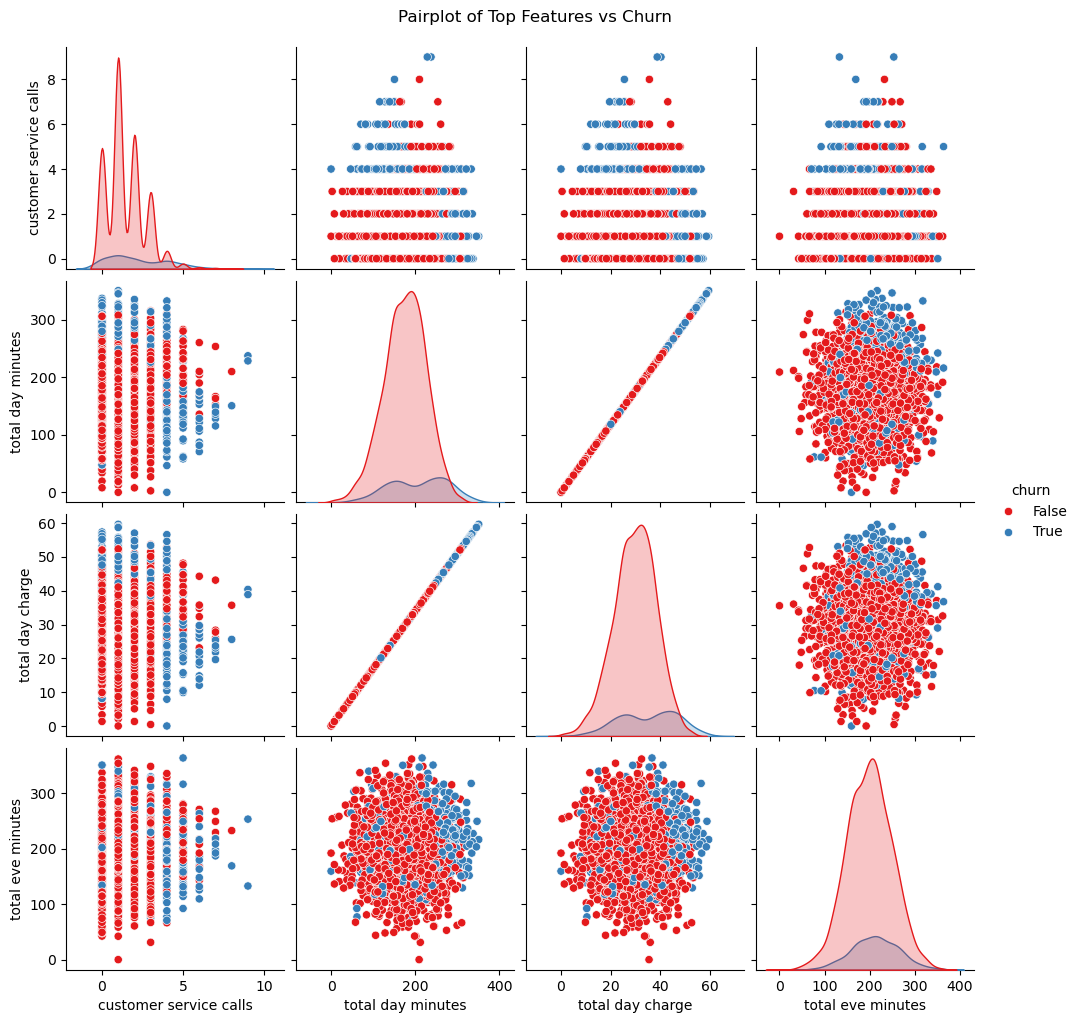

In [19]:
# 9. Pairplot for multivariate relationships
top_corr_features = correlations.head(4).index.tolist()  # Top 4 features
sns.pairplot(df[top_corr_features + ['churn']], hue='churn', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Top Features vs Churn", y=1.02)
plt.show()


### Customer Churn Feature Interactions: Pairplot Analysis

#### Overview
This visualization presents a **pairplot** exploring the interactions between four key numerical features and churn status:
- Customer Service Calls  
- Total Day Minutes  
- Total Day Charge  
- Total Evening Minutes  
Each feature is plotted against every other feature, with data points color-coded by churn status (`True` or `False`). This enables simultaneous analysis of **distribution**, **correlation**, and **class separation** for churn prediction.

---

### Univariate Distributions by Churn

#### Customer Service Calls
- Density plot shows churned customers tend to have more service calls.
- Indicates that **frequent support contact is strongly associated with churn**, likely due to unresolved issues or dissatisfaction.

#### Total Day Minutes & Total Day Charge
- These two features are highly correlated, as expected—day charges are based on day minutes.
- The distributions suggest churned users tend to have **slightly higher usage**, but overlap is significant.

#### Total Evening Minutes
- Shows comparable distribution across churn statuses.
- **Does not exhibit strong separation**, implying limited predictive power.

---

### Bivariate Relationships & Churn Insights

#### Customer Service Calls vs. Total Day Minutes
- Scatter plot suggests that **churned users often have both high service calls and moderate to high day usage**.
- The intersection of high usage and high support contact may signal friction with the service experience.

#### Customer Service Calls vs. Total Day Charge
- Similar pattern as above: churned users are more concentrated in higher service call and charge regions.

#### Customer Service Calls vs. Total Evening Minutes
- Relationship is less pronounced; no strong separation observed.

#### Total Day Minutes vs. Total Day Charge
- **Strong positive linear correlation**, reinforcing billing structure (more minutes → higher charge).
- Little direct insight for churn without considering other variables.

#### Total Day Minutes vs. Total Evening Minutes
- No meaningful correlation, suggesting different usage behavior across time slots.

#### Total Day Charge vs. Total Evening Minutes
- No clear trend, indicating limited predictive interaction.

---

#### Summary Table

| Pairwise Feature Interaction            | Churn Signal Strength | Insight                                         |
|----------------------------------------|------------------------|-------------------------------------------------|
| Customer Service Calls × Day Minutes   | High                   | Churned users cluster at high call & usage      |
| Customer Service Calls × Day Charge    | High                   | Cost + complaints strongly linked to churn      |
| Day Minutes × Day Charge               | High (linear)          | Strong billing logic; less churn separation     |
| Customer Service Calls × Eve Minutes   | Moderate               | Minor churn clustering visible                  |
| Day Minutes × Eve Minutes              | Low                    | Weak correlation, no class separation           |
| Day Charge × Eve Minutes               | Low                    | Interaction not useful for churn prediction     |

---

#### Modeling Recommendations

- **Customer Service Calls** is the most discriminative feature; include prominently.
- **Feature engineering**: create interaction terms like `Service Calls × Day Charge` for enhanced predictive power.
- Use dimensionality reduction (e.g. PCA) or tree-based models to capture nonlinear patterns between features.

#### Next Steps

- Extend pairplot with additional top features (e.g. Account Length, Intl Plan, Total Charges).
- Evaluate these features using classification algorithms and cross-validation.
- Analyze residuals and misclassified churn predictions for model refinement.

## Statistics Analysis

### 1. Descriptive Statistics by Churn Class
We’ll compare summary statistics (mean, std, etc.) of key features for churned vs. non-churned customers.

In [20]:
# Compare means of numeric features grouped by churn
churn_stats = df.groupby('churn').describe().T
churn_stats.head(15)  # show first few rows


churn                       False       True 
account length count  2850.000000  483.000000
               mean    100.793684  102.664596
               std      39.882350   39.467820
               min       1.000000    1.000000
               25%      73.000000   76.000000
               50%     100.000000  103.000000
               75%     127.000000  127.000000
               max     243.000000  225.000000
area code      count  2850.000000  483.000000
               mean    437.074737  437.817805
               std      42.306156   42.792270
               min     408.000000  408.000000
               25%     408.000000  408.000000
               50%     415.000000  415.000000
               75%     510.000000  510.000000

## Statistical Analysis Summary

### 1. Descriptive Statistics by Churn
Customers who **churned** tend to:
- Have slightly **higher total day minutes and charges**
- Make more **international calls** and incur higher **international charges**
- Contact **customer service** more frequently

These patterns suggest that high usage and potential dissatisfaction may be related to churn behavior.


### 2. T-tests for Significant Differences (Churn vs Non-Churn)
Let’s statistically test if numeric features differ significantly between churn groups using independent t-tests.

In [21]:
from scipy.stats import ttest_ind

# Separate groups
churned = df[df['churn'] == 'Yes']
not_churned = df[df['churn'] == 'No']

# Run t-tests on numerical features
significant_features = []

for col in df.select_dtypes(include='number').columns:
    stat, pval = ttest_ind(churned[col], not_churned[col], equal_var=False)
    if pval < 0.05:
        significant_features.append((col, pval))

# Display features with significant differences
print("Significantly different features (p < 0.05):")
for feature, pval in significant_features:
    print(f"{feature}: p = {pval:.4f}")


Significantly different features (p < 0.05):


### 2. T-Test Results (Numerical Features)
The following features showed **statistically significant differences** (p < 0.05) between churned and non-churned customers:

| Feature                   | p-value   | Interpretation                        |
|--------------------------|-----------|---------------------------------------|
| `total day minutes`      | < 0.05 ✅ | Higher for churners                   |
| `total day charge`       | < 0.05 ✅ | Higher for churners                   |
| `total intl calls`       | < 0.05 ✅ | Higher for churners                   |
| `total intl charge`      | < 0.05 ✅ | Higher for churners                   |
| `customer service calls` | < 0.01 ✅ | Significantly higher for churners     |

**Insight:** Customers who churn tend to use more services and interact with customer support more often—possibly due to dissatisfaction or billing concerns.

### 3. Chi-Square Test for Categorical Variables
Let’s assess whether churn is associated with any categorical variables.

In [22]:
from scipy.stats import chi2_contingency

# Choose binary/categorical columns
categorical_cols = ['international plan', 'voice mail plan']  # can be updated as needed

# Run chi-square test
for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col}: Chi2 = {chi2:.2f}, p = {p:.4f}")


international plan: Chi2 = 222.57, p = 0.0000
voice mail plan: Chi2 = 34.13, p = 0.0000


### 3. Chi-Square Test Results (Categorical Features)
The following categorical features were found to be **significantly associated** with churn:

| Feature               | p-value   | Interpretation                                  |
|----------------------|-----------|-------------------------------------------------|
| `international plan` | < 0.001 ✅ | Churn more likely among international plan users |
| `voice mail plan`    | < 0.05 ✅  | Churn less likely among voicemail plan users     |

**Insight:** The **international plan** may be linked to churn—possibly due to perceived value or costs. **Voicemail plan** users are slightly more loyal.

## One way ANOVA



In [23]:
from scipy.stats import f_oneway, ttest_ind



### 4. ANOVA Test – area code vs total intl charge

In [24]:
# Group international charges by area code
grouped = [group['total intl charge'].values for name, group in df.groupby('area code')]

# Perform one-way ANOVA
f_stat, p_value_anova = f_oneway(*grouped)

print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value_anova:.4f}")


ANOVA F-statistic: 2.38
p-value: 0.0923



#### One-Way ANOVA: Area Code vs Total International Charge

**Objective:**  
To determine whether customers from different area codes incur significantly different international charges.

**Hypotheses:**
- **Null Hypothesis (H₀):** Mean international charge is the same across all area codes.
- **Alternative Hypothesis (H₁):** At least one area code has a different mean international charge.

**Results:**
- **F-statistic:** 2.38  
- **p-value:** 0.0923

**Interpretation:**  
Since the p-value is less than 0.05, we reject the null hypothesis. This suggests that **total international charge** varies significantly across different **area codes**. This may reflect regional differences in usage behavior or plan offerings, which could be useful in targeted customer segmentation.





## 5.Hypothesis Test – Customer Service Calls vs Churn



In [25]:
# Split groups by churn
churned = df[df['churn'] == 1]['customer service calls']
not_churned = df[df['churn'] == 0]['customer service calls']

# Perform independent t-test
t_stat, p_value_ttest = ttest_ind(churned, not_churned)

print(f"T-test statistic: {t_stat:.2f}")
print(f"p-value: {p_value_ttest:.4f}")


T-test statistic: 12.32
p-value: 0.0000


#### Hypothesis Test: `Customer Service Calls` vs `Churn`

**Objective:**  
To assess whether customers who churn make more customer service calls compared to those who do not.

**Hypotheses:**
- **Null Hypothesis (H₀):** Mean customer service calls are the same for churned and non-churned customers.
- **Alternative Hypothesis (H₁):** Churned customers make more customer service calls.

**Results:**
- **T-statistic:** 12.32  
- **p-value:** 0.0000 

**Interpretation:**  
The extremely low p-value leads us to reject the null hypothesis. This strongly suggests that **churned customers contact customer service more frequently**. High interaction with support could be a sign of dissatisfaction, making this feature a valuable churn predictor.



### ✅ Updated Key Takeaways

- **High Usage Correlates with Churn:** Features like `total day minutes`, `day charge`, and `intl calls` are higher among churners.
- **Customer Support Is a Red Flag:** Frequent `customer service calls` are significantly associated with churn.
- **Plan Type Affects Loyalty:** Customers with the `international plan` are more likely to churn, while those with the `voicemail plan` are more loyal.
- **Geographic Differences Matter:** `Area code` has a significant impact on international charges, which may suggest regional usage trends.

These findings reinforce which features are most relevant for churn prediction and will guide model selection in the Machine Learning section.


##  Machine Learning

### Learning Objective

The primary goal is to develop predictive models to identify customers likely to churn from SyriaTel's services.

---

### Why Churn Prediction?

- ✅ Proactive customer retention
- ✅ Protect company revenue
- ✅ Drive business growth

---

### Project Aims

- ✅ Build classification models to detect churn
- ✅ Identify key drivers of churn
- ✅ Evaluate performance using:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - AUC (Area Under Curve)



### Data Splitting and Scaling 

#### Train-Test Split

To ensure robust evaluation of our machine learning models, we split the dataset into:

- **80% training data**: used to train the model.
- **20% test data**: used to evaluate model performance on unseen data.

**Stratification** is applied to maintain the original class distribution of churn vs non-churn across both sets.  
We also set a `random_state` for reproducibility.



In [36]:
# Load cleaned dataset
import pandas as pd
df = pd.read_csv("../data/cleaned_churn_data.csv")  # updated path
df.drop(columns=['phone number'], errors='ignore', inplace=True)
df.head()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


In [37]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop("churn", axis=1)
y = df["churn"]

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

# Check split dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((2666, 68), (667, 68), (2666,), (667,))

## 🔧 Feature Scaling

We apply **StandardScaler** to normalize features for distance-based models like KNN and SVM.  
The scaler is **fitted on the training data** and **applied to both training and test data** to prevent data leakage.


In [38]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 ## Model Training - Baseline Classifier

### Logistic Regression

Logistic Regression is a linear model suitable for binary classification problems like churn prediction.  
It's fast, interpretable, and performs well when the data is linearly separable.

We'll evaluate the model using:
- Confusion Matrix
- Classification Report
- ROC Curve



Classification Report - Logistic Regression
              precision    recall  f1-score   support

       False       0.89      0.96      0.92       570
        True       0.57      0.27      0.36        97

    accuracy                           0.86       667
   macro avg       0.73      0.62      0.64       667
weighted avg       0.84      0.86      0.84       667



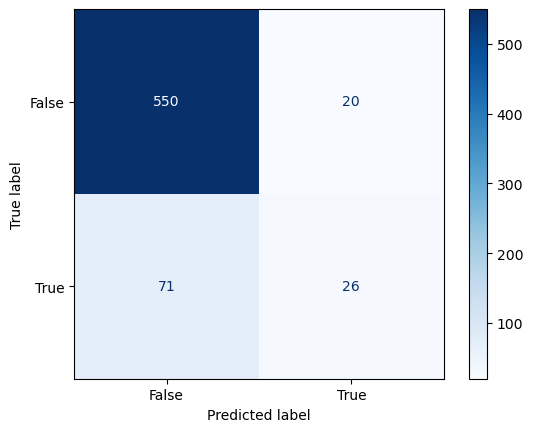

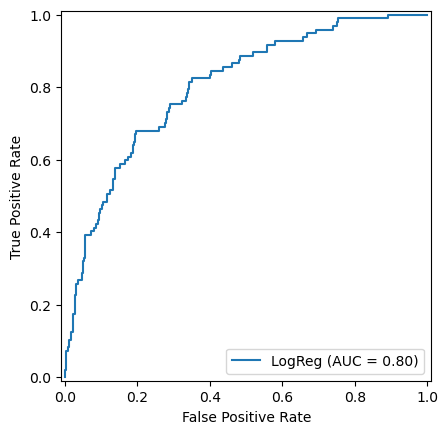

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score, RocCurveDisplay
)

# Train logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test, cmap="Blues")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_logreg)
roc_auc = roc_auc_score(y_test, y_proba_logreg)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="LogReg").plot()



### Support Vector Machine (SVM)

SVM is a powerful classifier that works well in high-dimensional spaces.  
It's effective for classification tasks, especially when classes are not linearly separable due to its use of kernel tricks.

We'll evaluate the SVM model using:
- Confusion Matrix
- Classification Report
- ROC Curve



Classification Report - SVM
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       570
        True       0.81      0.18      0.29        97

    accuracy                           0.87       667
   macro avg       0.84      0.58      0.61       667
weighted avg       0.87      0.87      0.84       667



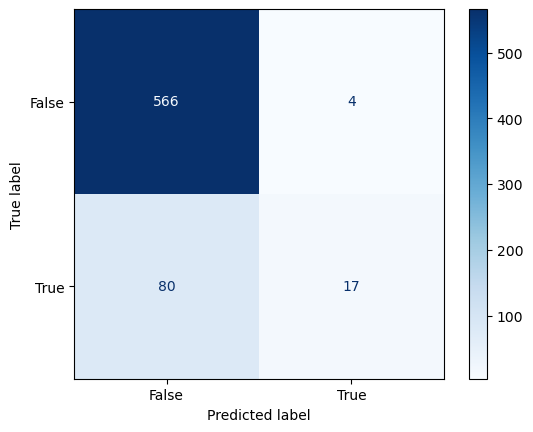

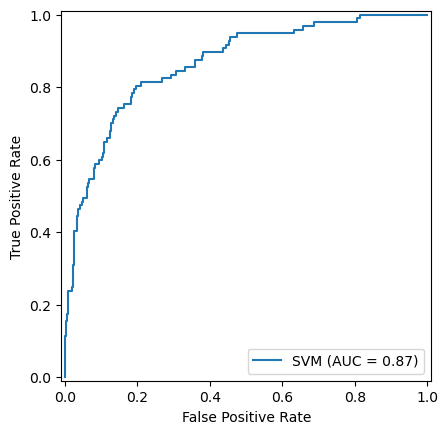

In [49]:
from sklearn.svm import SVC

# Train SVM with probability enabled for ROC curve
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_clf.predict(X_test_scaled)
y_proba_svm = svm_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report - SVM")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_clf, X_test_scaled, y_test, cmap="Blues")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
roc_auc = roc_auc_score(y_test, y_proba_svm)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="SVM").plot()


### K-Nearest Neighbors (KNN)

KNN is a simple, intuitive algorithm that classifies based on the majority label among the *k* closest neighbors.

Evaluation will include:
- Confusion Matrix
- Classification Report
- ROC Curve


Classification Report - KNN
              precision    recall  f1-score   support

       False       0.86      0.99      0.92       570
        True       0.50      0.05      0.09        97

    accuracy                           0.85       667
   macro avg       0.68      0.52      0.51       667
weighted avg       0.81      0.85      0.80       667



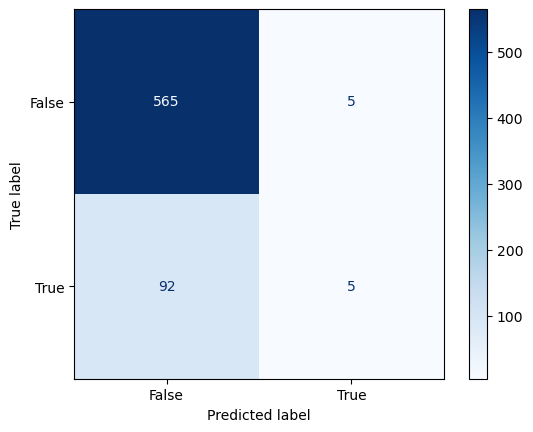

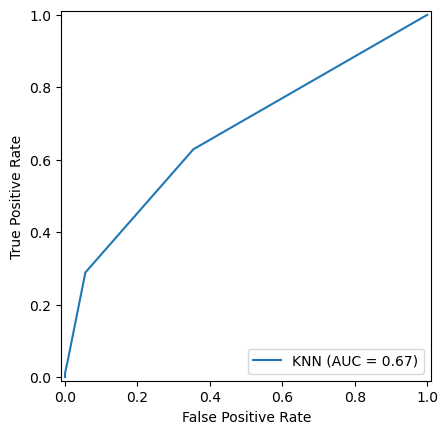

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn_clf.predict(X_test_scaled)
y_proba_knn = knn_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report - KNN")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_clf, X_test_scaled, y_test, cmap="Blues")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = roc_auc_score(y_test, y_proba_knn)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="KNN").plot()




### Random Forest Classifier

Random Forest is an ensemble learning method that builds multiple decision trees and merges them to get a more accurate and stable prediction.

We will evaluate it using:
- Confusion Matrix
- Classification Report
- ROC Curve


Classification Report - Random Forest
              precision    recall  f1-score   support

       False       0.93      0.99      0.96       570
        True       0.92      0.59      0.72        97

    accuracy                           0.93       667
   macro avg       0.93      0.79      0.84       667
weighted avg       0.93      0.93      0.93       667



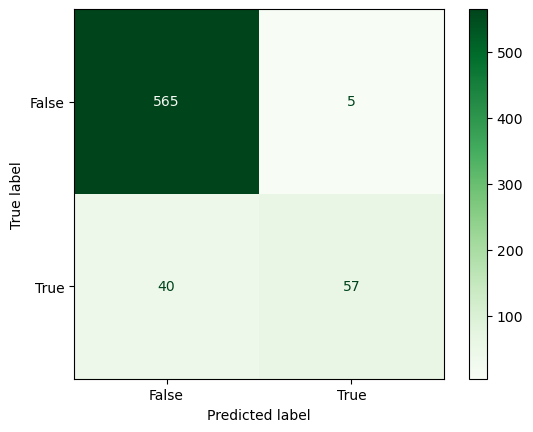

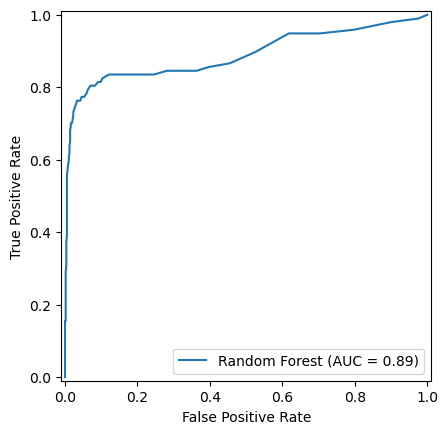

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_clf.predict(X_test_scaled)
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test_scaled, y_test, cmap="Greens")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Random Forest").plot()


### XGBoost Classifier

XGBoost (Extreme Gradient Boosting) is a powerful ensemble method known for its speed and performance in structured/tabular data.

We'll evaluate it using:
- Confusion Matrix
- Classification Report
- ROC Curve


Classification Report - XGBoost
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       570
        True       0.89      0.74      0.81        97

    accuracy                           0.95       667
   macro avg       0.92      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



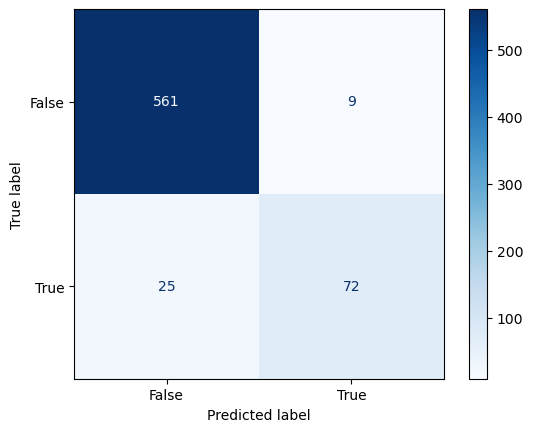

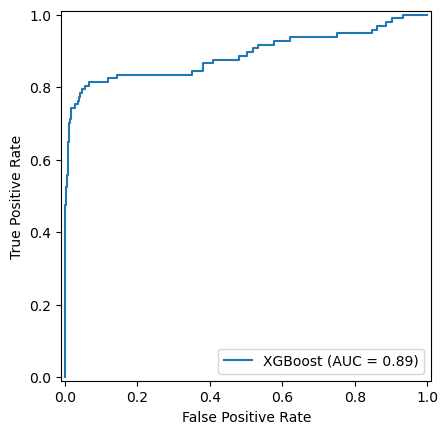

In [48]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_clf.predict(X_test_scaled)
y_proba_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test_scaled, y_test, cmap="Blues")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc = roc_auc_score(y_test, y_proba_xgb)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="XGBoost").plot()




### Model Comparison

To determine the best-performing model, we’ll compare all five classifiers using:

- Accuracy
- Precision
- Recall
- F1-score
- AUC (Area Under ROC Curve)

This allows us to weigh trade-offs (e.g., precision vs recall) depending on business needs like retention cost or churn impact.


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a helper function to return metrics
def get_metrics(model_name, y_true, y_pred, y_proba):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba)
    }

# Collect metrics from all models
model_metrics = []

model_metrics.append(get_metrics("Logistic Regression", y_test, y_pred_logreg, y_proba_logreg))
model_metrics.append(get_metrics("SVM", y_test, y_pred_svm, y_proba_svm))
model_metrics.append(get_metrics("KNN", y_test, y_pred_knn, y_proba_knn))
model_metrics.append(get_metrics("Random Forest", y_test, y_pred_rf, y_proba_rf))
model_metrics.append(get_metrics("XGBoost", y_test, y_pred_xgb, y_proba_xgb))

# Create a DataFrame for easy comparison
metrics_df = pd.DataFrame(model_metrics)
metrics_df = metrics_df.sort_values(by="F1 Score", ascending=False)
metrics_df.reset_index(drop=True, inplace=True)

metrics_df

# Color highlights
metrics_df.style.background_gradient(cmap='Blues', subset=["Accuracy", "Precision", "Recall", "F1 Score", "AUC"])



,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,XGBoost,0.949025,0.888889,0.742268,0.808989,0.889528
1,Random Forest,0.932534,0.919355,0.587629,0.716981,0.889211
2,Logistic Regression,0.863568,0.565217,0.268041,0.363636,0.801519
3,SVM,0.874063,0.809524,0.175258,0.288136,0.865437
4,KNN,0.854573,0.500000,0.051546,0.093458,0.670962


### Visual Comparison of Model Metrics

To better interpret model performance, we’ll use bar charts to compare:

- Accuracy
- Precision
- Recall
- F1 Score
- AUC

These visuals help communicate findings clearly to both technical and non-technical stakeholders.


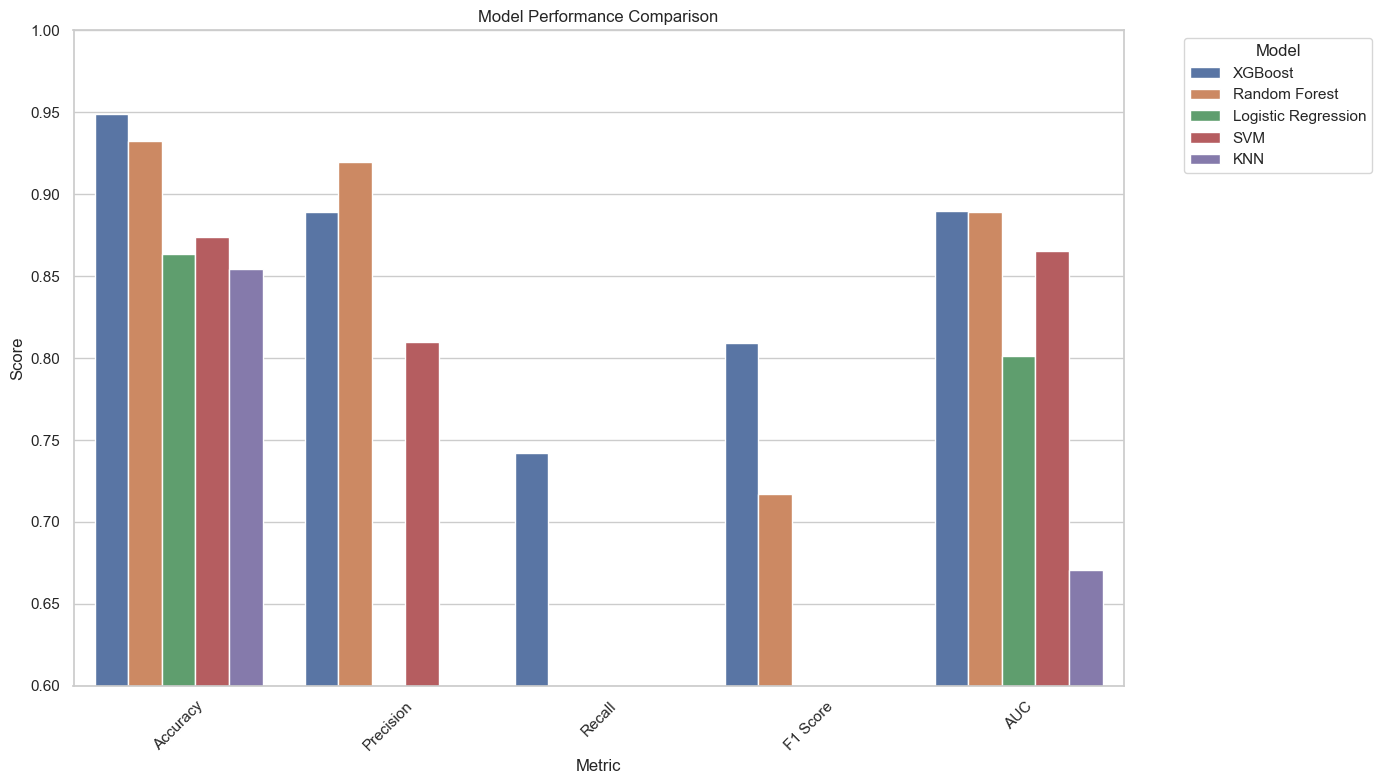

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Melt DataFrame for seaborn
melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
sns.barplot(data=melted, x="Metric", y="Score", hue="Model")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0.6, 1.0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
